In [3]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt


!pip install haversine
from haversine import haversine

from google.colab import files
uploaded = files.upload()
# Load the dataset
dataset = pd.read_csv("emails.csv")
print(dataset)
print(dataset.shape)
print(dataset.head(5))


Saving emails.csv to emails.csv
       Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrast

In [ ]:
# Check for missing values
print(dataset.isnull().sum())

NameError: name 'dataset' is not defined

In [ ]:
dataset.dropna(inplace=True)
print(dataset.isnull().sum())

NameError: name 'dataset' is not defined

In [ ]:
# Input and output data
x = dataset.drop(['Email No.', 'Prediction'], axis=1)
y = dataset['Prediction']

In [ ]:
# Feature scaling
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)

In [ ]:
# Cross-validation: splitting into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, random_state=0, test_size=0.25)

In [ ]:
# Model training using K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Predicting the test set results for KNN
y_pred_knn = knn.predict(x_test)
print("Predicted labels for KNN:", y_pred_knn)

Predicted labels for KNN: [0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.]


In [ ]:
# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("------KNN Confusion Matrix----------")
print(cm_knn)

------KNN Confusion Matrix----------
[[65 88]
 [ 5 58]]


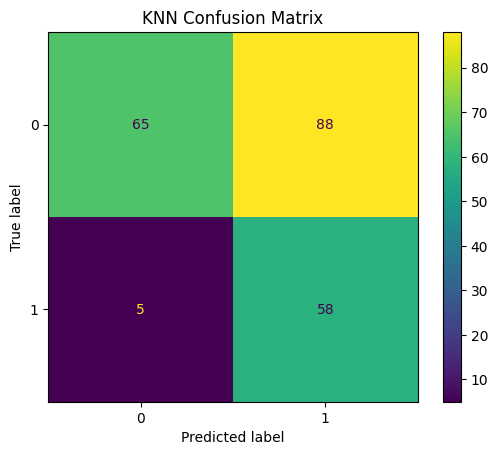

In [ ]:
# Display the confusion matrix for KNN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title("KNN Confusion Matrix")
plt.show()


In [ ]:

# Displaying accuracy score of KNN
print("-------------Accuracy score of KNN------------")
print(accuracy_score(y_test, y_pred_knn))

-------------Accuracy score of KNN------------
0.5694444444444444


In [ ]:
# Display classification report for KNN
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.42      0.58       153
         1.0       0.40      0.92      0.56        63

    accuracy                           0.57       216
   macro avg       0.66      0.67      0.57       216
weighted avg       0.77      0.57      0.57       216



In [ ]:
# Model training using Support Vector Machine
svm = SVC(kernel='linear')  # You can also try kernel='rbf' or others as needed
svm.fit(x_train, y_train)

# Predicting the test set results for SVM
y_pred_svm = svm.predict(x_test)

# Displaying accuracy score of SVM
print("-----------Accuracy score of SVM-----------")
print(accuracy_score(y_test, y_pred_svm))

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("------SVM Confusion Matrix----------")
print(cm_svm)

-----------Accuracy score of SVM-----------
0.9629629629629629
------SVM Confusion Matrix----------
[[151   2]
 [  6  57]]


In [ ]:
# Predicting the test set results for SVM
y_pred_svm = svm.predict(x_test)


In [ ]:
# Displaying accuracy score of SVM
print("-----------Accuracy score of SVM-----------")
print(accuracy_score(y_test, y_pred_svm))

-----------Accuracy score of SVM-----------
0.9629629629629629


In [ ]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("------SVM Confusion Matrix----------")
print(cm_svm)

------SVM Confusion Matrix----------
[[151   2]
 [  6  57]]


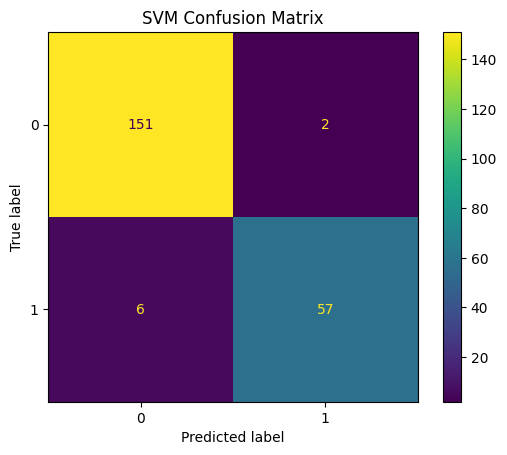

In [ ]:
# Display the confusion matrix for SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title("SVM Confusion Matrix")
plt.show()



In [ ]:
# Display classification report for SVM
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       153
         1.0       0.97      0.90      0.93        63

    accuracy                           0.96       216
   macro avg       0.96      0.95      0.95       216
weighted avg       0.96      0.96      0.96       216



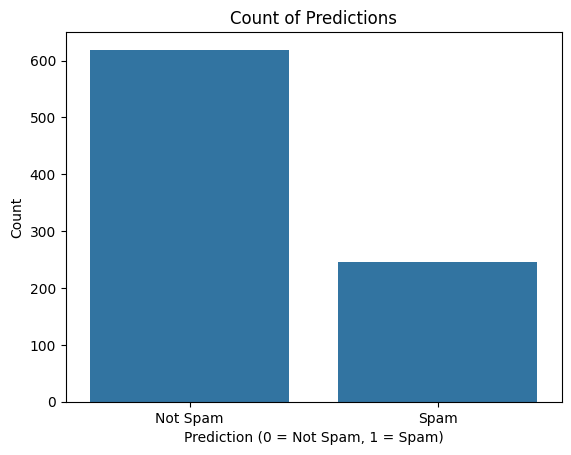

In [ ]:

# Visualizing count of predictions
sns.countplot(x=y)
plt.title('Count of Predictions')
plt.xlabel('Prediction (0 = Not Spam, 1 = Spam)')  # Adjust labels based on your data
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Spam', 'Spam'])  # Assuming 0 = Not Spam and 1 = Spam
plt.show()
